# Data transformation
1. Standarizing the data
 bring data into a standrize the data
 1. mixmax scaler 0 to 1
 2. standard scaler -3 to +3
 3. max-abs scaler -1 to 1 
These scalers are used on the linear data(the data that follows linear trends)\
**`asumptions of selecting alogirthim`**\
 if a algorithim can handle values in negative then we will use standard and max-abs scaler

### non paramertic data (the data which isn't in normal distributed)
then we use a tranfomer which is quantile trnsformer to convert distribution into uniform distribution\
the we convert this into guassian distribution

# standard scaling
-3 to +3 z-score nomralization\
z-score 

In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
# make an example dataset
data={'age':[45,67,38,34,25],
      'height':[180,156,170,145,155],
      'weight':[20,56,80,90,100]}
# convert this into pandas dataframe
df=pd.DataFrame(data)
df.head()

,age,height,weight
0,45,180,20
1,67,156,56
2,38,170,80
3,34,145,90
4,25,155,100


In [6]:
# now let's call the scaler 
scaler=StandardScaler()
# let's fit the Scaler on data 
Scaled_Df=scaler.fit_transform(df)
Scaled_Df
# now convert this into pandas dataframe
scaled_df=pd.DataFrame(Scaled_Df,columns=['age','height','weight'])
scaled_df

,age,height,weight
0,0.225958,1.526087,-1.719649
1,1.779420,-0.422109,-0.461369
2,-0.268325,0.714338,0.377484
3,-0.550773,-1.315032,0.727006
4,-1.186280,-0.503284,1.076528


In [12]:
# now use with other scalers 
from sklearn.preprocessing import MinMaxScaler , MaxAbsScaler
# now let's call scaler here to do it's magic
scaler= MinMaxScaler()
# now let's fit this scaler on the data 
scaled_df=scaler.fit_transform(df)
scaled_df
# now convert this into pandas dataframe 
scaled_df2=pd.DataFrame(scaled_df,columns=['age','height','weight'])
scaled_df2.head()



,age,height,weight
0,0.476190,1.000000,0.000
1,1.000000,0.314286,0.450
2,0.309524,0.714286,0.750
3,0.214286,0.000000,0.875
4,0.000000,0.285714,1.000


In [14]:
# now lets thrid scaler
scaler=MaxAbsScaler()
# fit this scaler
scaled_df3=scaler.fit_transform(df)
scaled_df3
# convert into pandas Dataframe
Scaled_df4=pd.DataFrame(scaled_df3,columns=df.columns)
Scaled_df4.head()

,age,height,weight
0,0.671642,1.000000,0.20
1,1.000000,0.866667,0.56
2,0.567164,0.944444,0.80
3,0.507463,0.805556,0.90
4,0.373134,0.861111,1.00


In [16]:
from sklearn.preprocessing import RobustScaler
# let's call this scaler
scaler=RobustScaler()
# let's fit this scaler
df2=scaler.fit_transform(df)
df2
df3=pd.DataFrame(df2,columns=df.columns)
df3

,age,height,weight
0,0.636364,1.600000,-1.764706
1,2.636364,0.000000,-0.705882
2,0.000000,0.933333,0.000000
3,-0.363636,-0.733333,0.294118
4,-1.181818,-0.066667,0.588235


_____________________

# Non linear Transformation of Data 

In [18]:
# importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# let's generatea  random non-linear data here 
np.random.seed(0)
df1=np.random.exponential(size=1000,scale=2)
df1
df=pd.DataFrame(df1,columns=['values'])
df.head()
df.shape

(1000, 1)

<Axes: xlabel='values', ylabel='Count'>

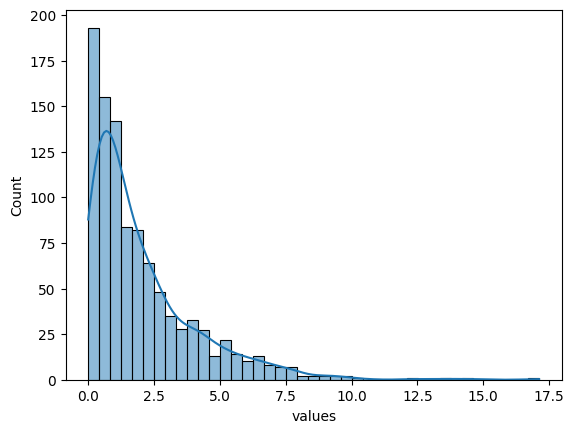

In [33]:
sns.histplot(df['values'],kde=True)

In [45]:
# we are calling here all the transformers
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
pt_boxcox=PowerTransformer(method='box-cox')
pt_yeo=PowerTransformer(method='yeo-johnson')
qt=QuantileTransformer(output_distribution='normal')

# now transform the data 
df['box-cox']=pt_boxcox.fit_transform(df[['values']]+1)
df['yeo-johnson']=pt_yeo.fit_transform(df[['values']])
df['qt']=qt.fit_transform(df[['values']])
# now let see data 
df.head()

,values,box-cox,yeo-johnson,qt
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


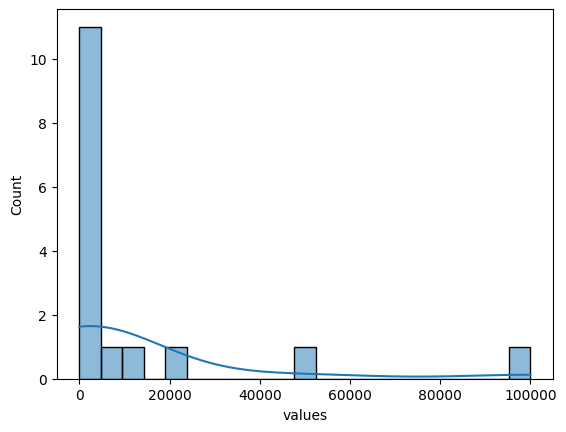

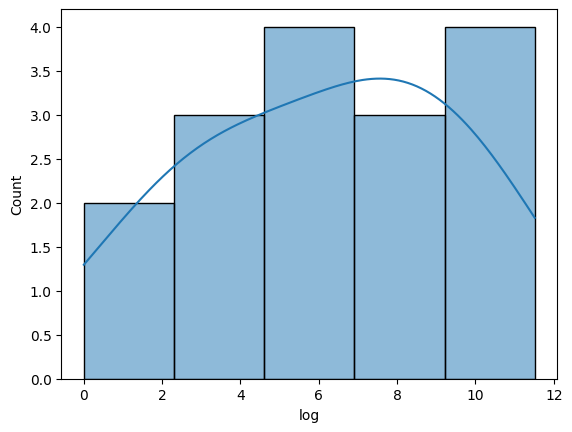

In [68]:
# now let's histplot for data to see transformation
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()

<Axes: xlabel='box-cox', ylabel='Count'>

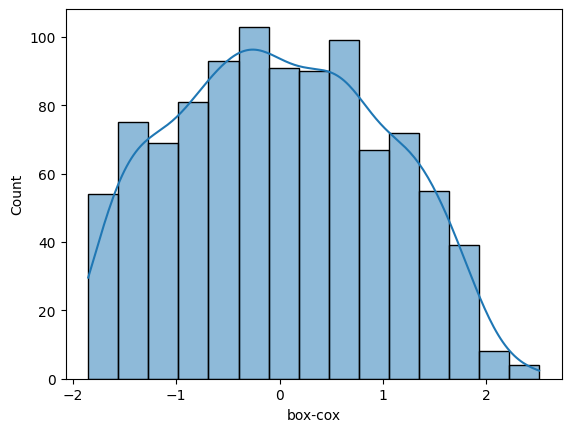

In [41]:
sns.histplot(df['box-cox'],kde=True)

<Axes: xlabel='yeo-johnson', ylabel='Count'>

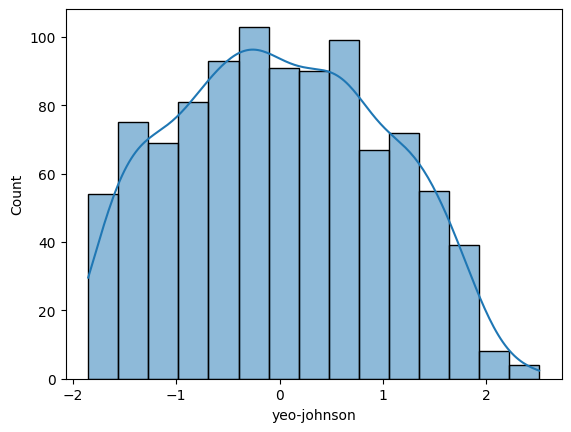

In [44]:
sns.histplot(df['yeo-johnson'],kde=True)

<Axes: xlabel='qt', ylabel='Count'>

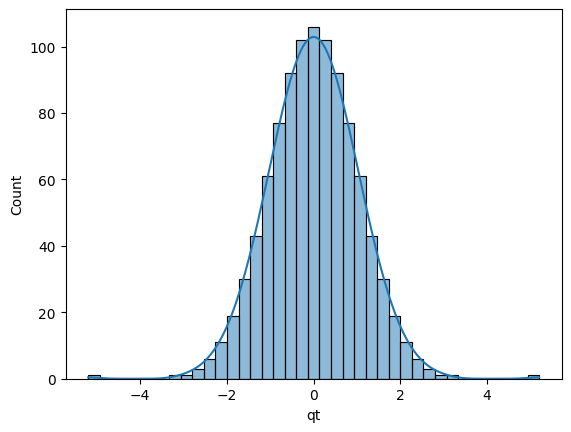

In [46]:
sns.histplot(df['qt'],kde=True)

________________


# Normalization of Data 
1. L1 normalization 
2. L2 normalization


In [57]:
from sklearn.preprocessing import Normalizer
data=[1,1,1],[1,1,0],[1,0,0]
normalize =  Normalizer(norm="l1")
normal_data = normalize.fit_transform(data)
normal_data

array([[0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        ]])

In [58]:
from sklearn.preprocessing import Normalizer
data = [1,1,1],[1,1,0],[1,0,0]
normalize=Normalizer(norm='l2')
normal_data= normalize.fit_transform(data)
normal_data 

array([[0.57735027, 0.57735027, 0.57735027],
       [0.70710678, 0.70710678, 0.        ],
       [1.        , 0.        , 0.        ]])

# L2 normlaization 
This types of nomralizaion rescales to (row) to ahve  a unit norm.This type of normalization is often used when dealing with text data. The L2 normalization is calculated using square root of the sum of the squared vector values .

# Log Transformation

In [60]:
# example dataset with skewwd data points 
df=pd.DataFrame({"values":[1,5,10,20,50,100,200,500,1000,2000,3000,5000,10000,20000,50000,100000]})
df

,values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


<Axes: xlabel='values', ylabel='Count'>

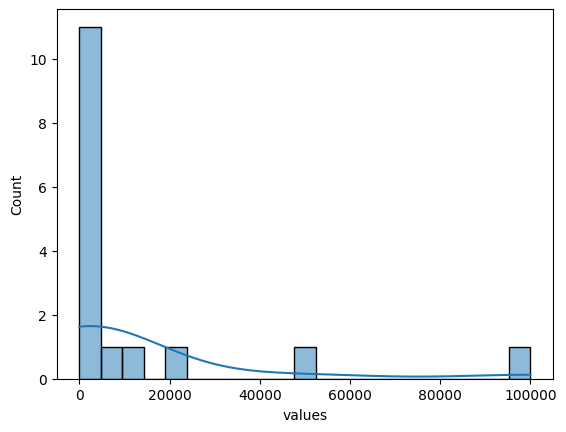

In [61]:
sns.histplot(df['values'],kde=True)

In [64]:
# now log tranform this data 
df['log']=np.log(df['values'])
df

,values,log
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


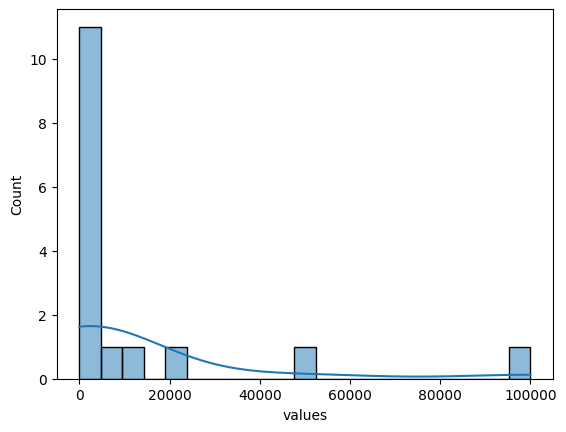

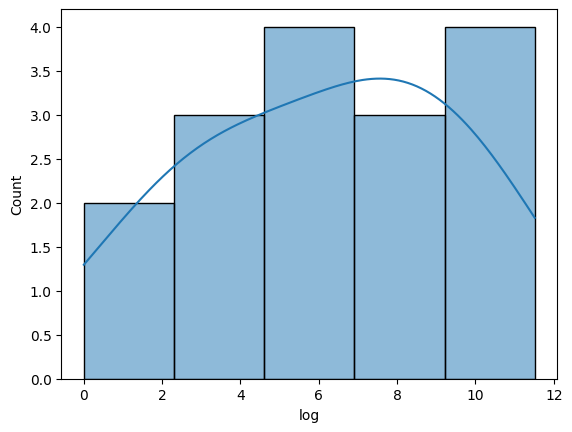

In [67]:
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()

data scaling                                  and data normlization\
both used in  ml in preprocessing are called data transformation.\
scaling is used in data analytics as well..